In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [2]:
iris=datasets.load_iris()
x=pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y=pd.DataFrame(iris['target'], columns=['target'])
iris_data=pd.concat([x,y], axis=1)
iris_data.head(3)

target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [3]:
#一、Matplotlib
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

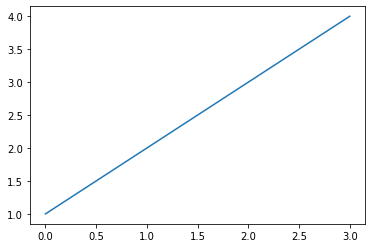

In [5]:
#only y
plt.plot([1, 2, 3, 4])

Text(0.5, 0, 'x label')

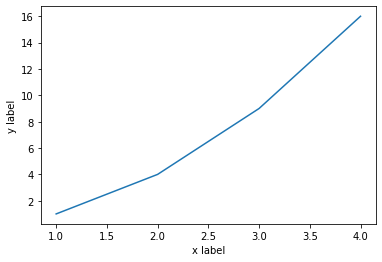

In [6]:
#自訂x和y
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.ylabel('y label')
plt.xlabel('x label')

(0.0, 6.0, 0.0, 20.0)

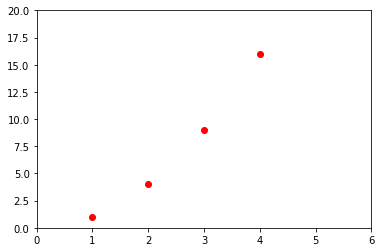

In [7]:
#改變線的形狀和顏色
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
#設定軸的範圍
plt.axis([0, 6, 0, 20])

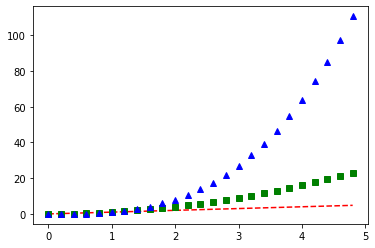

In [8]:
#一圖多線
t=np.arange(0., 5., 0.2)
plt.plot(t, t, 'r--', t, t**2, 'gs', t, t**3, 'b^')

<BarContainer object of 20 artists>

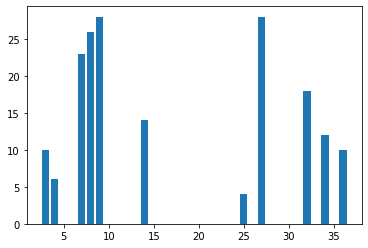

In [9]:
#直方圖
x=[3, 3, 4, 7, 7, 7, 8, 9, 9, 14, 14, 25, 27, 27, 27, 32, 32, 34, 36, 36]
y=[2, 10, 6, 6, 23, 20, 26, 28, 16, 14, 12, 4, 10, 28, 24, 18, 9, 12, 10, 4]
plt.bar(x, y)

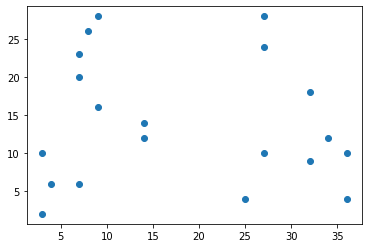

In [10]:
#散布圖
x=[3, 3, 4, 7, 7, 7, 8, 9, 9, 14, 14, 25, 27, 27, 27, 32, 32, 34, 36, 36]
y=[2, 10, 6, 6, 23, 20, 26, 28, 16, 14, 12, 4, 10, 28, 24, 18, 9, 12, 10, 4]
plt.scatter(x, y)

In [11]:
#二、Pandas plot

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>

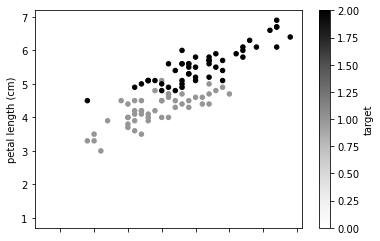

In [12]:
iris_data.plot.scatter(x='sepal length (cm)', y='petal length (cm)', c='target')

In [13]:
#改顏色
color={0:'g', 1:'r', 2:'b'}

In [14]:
iris_data['color']=iris_data['target'].map(color)

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>

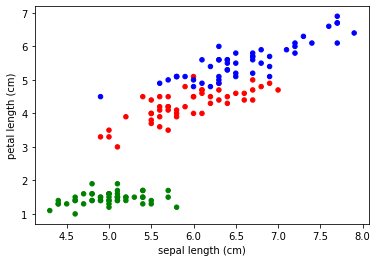

In [15]:
iris_data.plot.scatter(x='sepal length (cm)', y='petal length (cm)', c=iris_data['color'])

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>

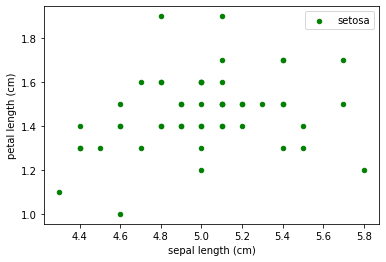

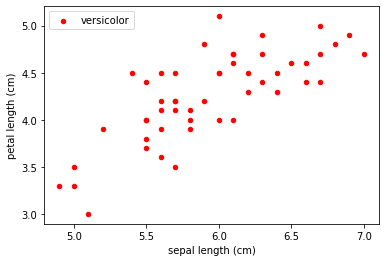

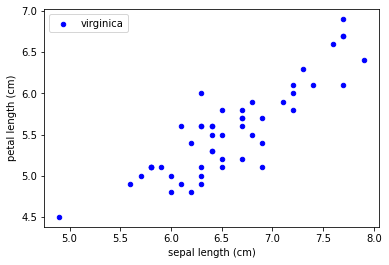

In [16]:
#Add label
iris_data[iris_data['target']==0].plot.scatter(x='sepal length (cm)', y='petal length (cm)', color='g', label='setosa')
iris_data[iris_data['target']==1].plot.scatter(x='sepal length (cm)', y='petal length (cm)', color='r', label='versicolor')
iris_data[iris_data['target']==2].plot.scatter(x='sepal length (cm)', y='petal length (cm)', color='b', label='virginica')

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>

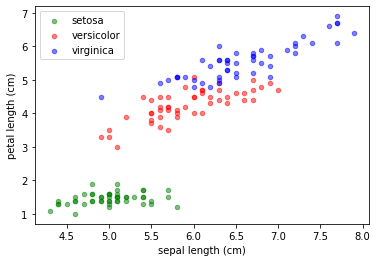

In [17]:
#將圖合併,優化(透明度)
ax=iris_data[iris_data['target']==0].plot.scatter(x='sepal length (cm)', y='petal length (cm)', alpha=0.5, color='g', label='setosa')
ax=iris_data[iris_data['target']==1].plot.scatter(x='sepal length (cm)', y='petal length (cm)', alpha=0.5, color='r', label='versicolor', ax=ax)
iris_data[iris_data['target']==2].plot.scatter(x='sepal length (cm)', y='petal length (cm)', alpha=0.5, color='b', label='virginica', ax=ax)

In [18]:
#三、Seaborn

In [19]:
import seaborn as sns

/Users/irene/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


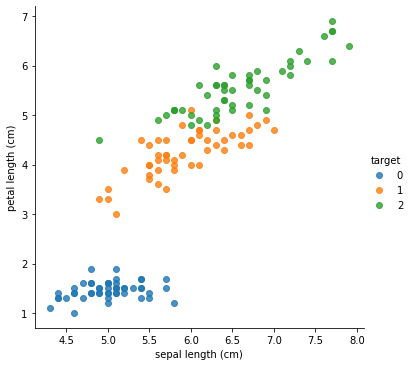

In [20]:
sns.lmplot('sepal length (cm)', 'petal length (cm)',data=iris_data, fit_reg=False, hue='target')

In [21]:
target_name={0:'setosa', 1:'versicolor', 2:'virginica'}

In [22]:
iris_data['target_name']=iris_data['target'].map(target_name)

/Users/irene/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


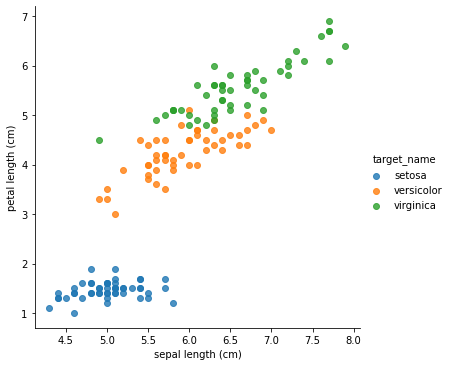

In [23]:
sns.lmplot('sepal length (cm)', 'petal length (cm)',data=iris_data, fit_reg=False, hue='target_name')

In [24]:
#四、Plotly

In [25]:
#折線圖
import plotly
from plotly.graph_objs import Scatter, Layout
plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot({"data": [Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])], "layout": Layout(title="test")})

In [26]:
#散布圖
from chart_studio import plotly
import plotly.offline as pyoff
import plotly.graph_objs as go
import numpy as np

In [29]:
#套入iris資料
trace0=go.Scatter(x=iris_data[iris_data['target']==0]['sepal length (cm)'], y=iris_data[iris_data['target']==0]['petal length (cm)'], mode='markers', name='setosa')
trace1=go.Scatter(x=iris_data[iris_data['target']==1]['sepal length (cm)'], y=iris_data[iris_data['target']==1]['petal length (cm)'], mode='markers', name='versicolor')
trace2=go.Scatter(x=iris_data[iris_data['target']==2]['sepal length (cm)'], y=iris_data[iris_data['target']==2]['petal length (cm)'], mode='markers', name='virginica')
data=[trace0, trace1, trace2]
pyoff.iplot(data, filename='basic-scatter')

In [30]:
#3D圖形
from chart_studio import plotly
import plotly.offline as pyoff
import plotly.graph_objs as go
import numpy as np

x, y, z=np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 400).transpose()

trace1=go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=12, color=z, colorscale='Viridis', opacity=0.8))
data=[trace1]
layout=go.Layout(margin=dict(l=0, r=0, b=0, t=0))
fig=go.Figure(data=data, layout=layout)
pyoff.iplot(fig, filename='3d-scatter-colorscale')